In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
# Step 1: Import PySpark
from pyspark.sql import SparkSession

# Step 2: Create a Spark session
spark = SparkSession.builder.appName("StudentExamAnalysis").getOrCreate()

# Step 3: Load your dataset
df = spark.read.csv("student_exam_scores.csv", header=True, inferSchema=True)

# Step 4: Display the first few records
df.show(5)

# Step 5: Print schema to verify column types
df.printSchema()

# Step 6: Check number of rows
print("Total records:", df.count())

# Step 7: View all column names
print("Columns:", df.columns)


+----------+-------------+-----------+------------------+---------------+----------+
|student_id|hours_studied|sleep_hours|attendance_percent|previous_scores|exam_score|
+----------+-------------+-----------+------------------+---------------+----------+
|      S001|          8.0|        8.8|              72.1|             45|      30.2|
|      S002|          1.3|        8.6|              60.7|             55|      25.0|
|      S003|          4.0|        8.2|              73.7|             86|      35.8|
|      S004|          3.5|        4.8|              95.1|             66|      34.0|
|      S005|          9.1|        6.4|              89.8|             71|      40.3|
+----------+-------------+-----------+------------------+---------------+----------+
only showing top 5 rows
root
 |-- student_id: string (nullable = true)
 |-- hours_studied: double (nullable = true)
 |-- sleep_hours: double (nullable = true)
 |-- attendance_percent: double (nullable = true)
 |-- previous_scores: inte

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

In [10]:
#2️⃣ Create Spark Session
spark = SparkSession.builder.appName("StudentExamAnalysis").getOrCreate()

In [11]:
# 3️⃣ Load Dataset
df = spark.read.csv("student_exam_scores.csv", header=True, inferSchema=True)

print("✅ Dataset Loaded Successfully!")
df.show(5)
df.printSchema()

✅ Dataset Loaded Successfully!
+----------+-------------+-----------+------------------+---------------+----------+
|student_id|hours_studied|sleep_hours|attendance_percent|previous_scores|exam_score|
+----------+-------------+-----------+------------------+---------------+----------+
|      S001|          8.0|        8.8|              72.1|             45|      30.2|
|      S002|          1.3|        8.6|              60.7|             55|      25.0|
|      S003|          4.0|        8.2|              73.7|             86|      35.8|
|      S004|          3.5|        4.8|              95.1|             66|      34.0|
|      S005|          9.1|        6.4|              89.8|             71|      40.3|
+----------+-------------+-----------+------------------+---------------+----------+
only showing top 5 rows
root
 |-- student_id: string (nullable = true)
 |-- hours_studied: double (nullable = true)
 |-- sleep_hours: double (nullable = true)
 |-- attendance_percent: double (nullable = t

In [12]:
# 4️⃣ Analysis 1: Summary Statistics
print("\n📊 1. Summary Statistics:")
df.describe().show()


📊 1. Summary Statistics:
+-------+----------+------------------+-----------------+------------------+------------------+------------------+
|summary|student_id|     hours_studied|      sleep_hours|attendance_percent|   previous_scores|        exam_score|
+-------+----------+------------------+-----------------+------------------+------------------+------------------+
|  count|       200|               200|              200|               200|               200|               200|
|   mean|      NULL|            6.3255|6.621999999999999| 74.82999999999998|              66.8| 33.95499999999999|
| stddev|      NULL|3.2273174058637233|1.497138308767059|14.249905227578703|15.663868740499526|6.7895482047129345|
|    min|      S001|               1.0|              4.0|              50.3|                40|              17.1|
|    max|      S200|              12.0|              9.0|             100.0|                95|              51.3|
+-------+----------+------------------+---------------

In [13]:
# 5️⃣ Analysis 2: Correlation Analysis

print("\n📈 2. Correlation with Exam Score:")
corr_data = {
    "hours_studied": df.stat.corr("hours_studied", "exam_score"),
    "sleep_hours": df.stat.corr("sleep_hours", "exam_score"),
    "attendance_percent": df.stat.corr("attendance_percent", "exam_score"),
    "previous_scores": df.stat.corr("previous_scores", "exam_score")
}
for feature, value in corr_data.items():
    print(f"{feature} → {value:.3f}")



📈 2. Correlation with Exam Score:
hours_studied → 0.777
sleep_hours → 0.188
attendance_percent → 0.226
previous_scores → 0.431


In [14]:
# 6️⃣ Analysis 3: Study Hours vs Exam Score

study_trend = df.groupBy("hours_studied").agg(F.avg("exam_score").alias("avg_exam_score")).orderBy("hours_studied")
print("\n📘 3. Study Hours vs Average Exam Score:")
study_trend.show(5)


📘 3. Study Hours vs Average Exam Score:
+-------------+-----------------+
|hours_studied|   avg_exam_score|
+-------------+-----------------+
|          1.0|             21.2|
|          1.1|            24.25|
|          1.2|             26.8|
|          1.3|26.96666666666667|
|          1.4|             32.2|
+-------------+-----------------+
only showing top 5 rows


In [15]:
# 7️⃣ Analysis 4: Sleep Hours vs Exam Score

sleep_trend = df.groupBy("sleep_hours").agg(F.avg("exam_score").alias("avg_exam_score")).orderBy("sleep_hours")
print("\n😴 4. Sleep Hours vs Average Exam Score:")
sleep_trend.show(5)


😴 4. Sleep Hours vs Average Exam Score:
+-----------+------------------+
|sleep_hours|    avg_exam_score|
+-----------+------------------+
|        4.0|30.620000000000005|
|        4.1|              20.1|
|        4.3|30.633333333333336|
|        4.4|            34.125|
|        4.5|             33.04|
+-----------+------------------+
only showing top 5 rows


In [16]:
# 8️⃣ Analysis 5: Attendance vs Exam Score

att_trend = df.groupBy("attendance_percent").agg(F.avg("exam_score").alias("avg_exam_score")).orderBy("attendance_percent")
print("\n🎓 5. Attendance vs Average Exam Score:")
att_trend.show(5)


🎓 5. Attendance vs Average Exam Score:
+------------------+--------------+
|attendance_percent|avg_exam_score|
+------------------+--------------+
|              50.3|         29.45|
|              50.5|          42.0|
|              51.0|         35.95|
|              51.2|          34.1|
|              51.3|          33.2|
+------------------+--------------+
only showing top 5 rows


In [17]:
# 9️⃣ Analysis 6: Improvement (Previous vs Current)

df = df.withColumn("improvement", df.exam_score - df.previous_scores)
improve_stats = df.agg(
    F.avg("improvement").alias("avg_improvement"),
    F.max("improvement").alias("max_improvement"),
    F.min("improvement").alias("min_improvement")
)
print("\n📈 6. Score Improvement Statistics:")
improve_stats.show()



📈 6. Score Improvement Statistics:
+-------------------+-------------------+---------------+
|    avg_improvement|    max_improvement|min_improvement|
+-------------------+-------------------+---------------+
|-32.845000000000006|-1.8999999999999986|          -66.2|
+-------------------+-------------------+---------------+



In [18]:
# 🔟 Convert to Pandas for Visualization

study_pd = study_trend.toPandas()
sleep_pd = sleep_trend.toPandas()
att_pd = att_trend.toPandas()
imp_pd = df.select("improvement").toPandas()

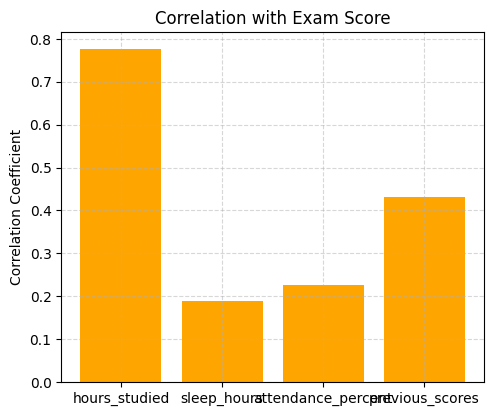

In [19]:

plt.figure(figsize=(12,10))

# 1️⃣ Correlation Bar Chart
plt.subplot(2,2,1)
plt.bar(corr_data.keys(), corr_data.values(), color='orange')
plt.title("Correlation with Exam Score")
plt.ylabel("Correlation Coefficient")
plt.grid(True, linestyle="--", alpha=0.5)

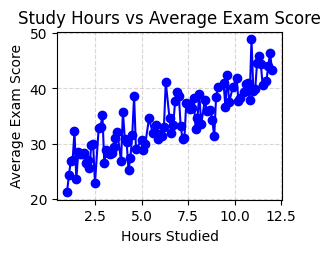

In [20]:
# 2️⃣ Study Hours vs Exam Score (Line)
plt.subplot(2,2,2)
plt.plot(study_pd["hours_studied"], study_pd["avg_exam_score"], marker='o', color='blue')
plt.title("Study Hours vs Average Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Average Exam Score")
plt.grid(True, linestyle="--", alpha=0.5)


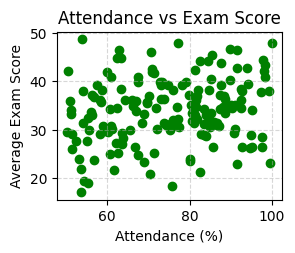

In [21]:
# 3️⃣ Attendance vs Exam Score (Scatter)
plt.subplot(2,2,3)
plt.scatter(att_pd["attendance_percent"], att_pd["avg_exam_score"], color='green')
plt.title("Attendance vs Exam Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Average Exam Score")
plt.grid(True, linestyle="--", alpha=0.5)

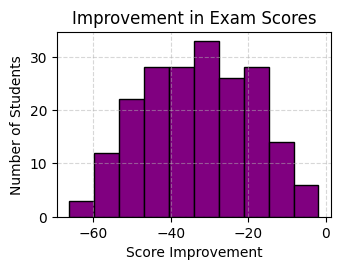

In [22]:
# 4️⃣ Improvement Distribution (Histogram)
plt.subplot(2,2,4)
plt.hist(imp_pd["improvement"], bins=10, color='purple', edgecolor='black')
plt.title("Improvement in Exam Scores")
plt.xlabel("Score Improvement")
plt.ylabel("Number of Students")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [26]:
# Regression Relationship (Linear Trend)
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Prepare data for linear regression
assembler = VectorAssembler(inputCols=["hours_studied"], outputCol="features")
lr_data = assembler.transform(df).select("features", "exam_score")

# Train linear regression model
lr = LinearRegression(featuresCol="features", labelCol="exam_score")
lr_model = lr.fit(lr_data)

print("\n📈 1. Regression Coefficients:")
print(f"Coefficient: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")
print(f"R² Value: {lr_model.summary.r2:.3f}")



📈 1. Regression Coefficients:
Coefficient: [1.634109896128476]
Intercept: 23.618437852039314
R² Value: 0.603


In [25]:
#Rank Students by Efficiency
df_eff = df.withColumn("efficiency", F.col("exam_score") / F.col("hours_studied"))
print("\n💡 2. Top 5 Most Efficient Students:")
df_eff.orderBy(F.col("efficiency").desc()).select("student_id", "hours_studied", "exam_score", "efficiency").show(5)



💡 2. Top 5 Most Efficient Students:
+----------+-------------+----------+------------------+
|student_id|hours_studied|exam_score|        efficiency|
+----------+-------------+----------+------------------+
|      S101|          1.1|      31.4|28.545454545454543|
|      S013|          1.3|      31.2|              24.0|
|      S068|          1.4|      32.2|23.000000000000004|
|      S127|          1.2|      26.8|22.333333333333336|
|      S125|          1.0|      21.2|              21.2|
+----------+-------------+----------+------------------+
only showing top 5 rows


In [27]:
#Attendance Group Analysis
df_grouped = df.withColumn(
    "attendance_group",
    F.when(F.col("attendance_percent") >= 90, "Excellent")
     .when(F.col("attendance_percent") >= 75, "Good")
     .when(F.col("attendance_percent") >= 60, "Average")
     .otherwise("Poor")
)
print("\n🎓 4. Average Exam Score by Attendance Group:")
df_grouped.groupBy("attendance_group").agg(F.avg("exam_score").alias("avg_exam_score")).show()



🎓 4. Average Exam Score by Attendance Group:
+----------------+------------------+
|attendance_group|    avg_exam_score|
+----------------+------------------+
|       Excellent|             35.36|
|         Average|33.970967741935496|
|            Good| 34.75303030303029|
|            Poor| 31.17567567567568|
+----------------+------------------+



In [28]:
#Performance Improvement Flag
df_flag = df.withColumn(
    "performance_change",
    F.when(F.col("exam_score") > F.col("previous_scores"), "Improved")
     .when(F.col("exam_score") == F.col("previous_scores"), "No Change")
     .otherwise("Declined")
)
print("\n📊 5. Student Performance Change Counts:")
df_flag.groupBy("performance_change").count().show()



📊 5. Student Performance Change Counts:
+------------------+-----+
|performance_change|count|
+------------------+-----+
|          Declined|  200|
+------------------+-----+



In [29]:
# Outlier Detection
# Compute mean and std deviation
stats = df.select(F.mean("exam_score"), F.stddev("exam_score")).first()
mean_score, stddev_score = stats[0], stats[1]

df_outliers = df.withColumn(
    "performance_level",
    F.when(F.col("exam_score") > mean_score + 2 * stddev_score, "High Outlier")
     .when(F.col("exam_score") < mean_score - 2 * stddev_score, "Low Outlier")
     .otherwise("Normal")
)

print("\n🚨 6. Outlier Students:")
df_outliers.groupBy("performance_level").count().show()



🚨 6. Outlier Students:
+-----------------+-----+
|performance_level|count|
+-----------------+-----+
|     High Outlier|    5|
|           Normal|  191|
|      Low Outlier|    4|
+-----------------+-----+

